In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teste = pd.read_csv(r'./kaggle_files/test.csv')
treino = pd.read_csv(r'./kaggle_files/train.csv')

In [3]:
display(treino.head(4))
display(teste.head(4))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [4]:
(treino.isnull().sum().sort_values(ascending=False)/treino.shape[0])[:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [5]:
treino[['PoolQC','MiscFeature','Alley','Fence']]= treino[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

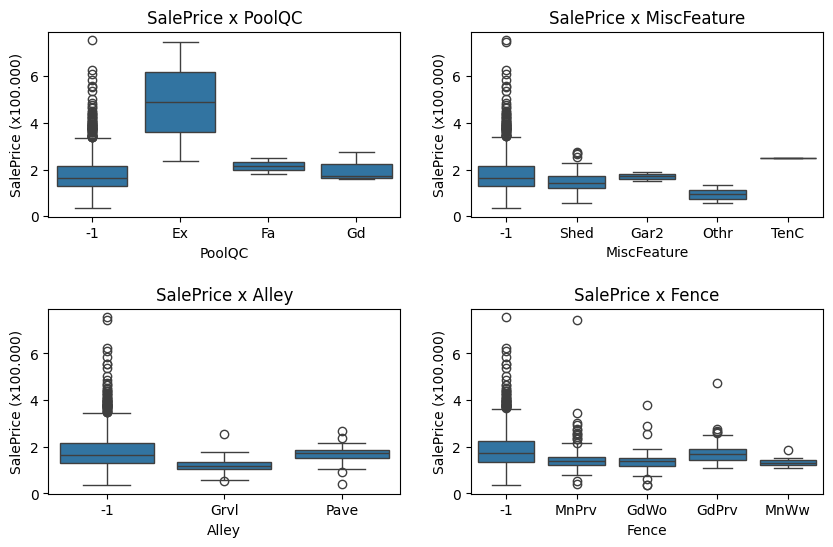

In [6]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,6))

sns.boxplot(data=treino, x=treino.PoolQC,y=treino.SalePrice/100000,ax=ax[0,0])
ax[0,0].set_ylabel('SalePrice (x100.000)')
ax[0,0].set_title('SalePrice x PoolQC')
sns.boxplot(data=treino, x=treino.MiscFeature,y=treino.SalePrice/100000,ax=ax[0,1])
ax[0,1].set_ylabel('SalePrice (x100.000)')
ax[0,1].set_title('SalePrice x MiscFeature')
sns.boxplot(data=treino, x=treino.Alley,y=treino.SalePrice/100000,ax=ax[1,0])
ax[1,0].set_ylabel('SalePrice (x100.000)')
ax[1,0].set_title('SalePrice x Alley')
sns.boxplot(data=treino, x=treino.Fence,y=treino.SalePrice/100000,ax=ax[1,1])
ax[1,1].set_ylabel('SalePrice (x100.000)')
ax[1,1].set_title('SalePrice x Fence')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [7]:
teste.shape

(1459, 80)

In [8]:
teste[['PoolQC','MiscFeature','Alley','Fence']]= teste[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

In [9]:
# Analisando coluna FireplaceQu
## Fireplaces: Number of fireplaces
## FireplaceQu: Fireplace quality
treino[['Fireplaces','FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            690
1           Gd             324
            TA             259
2           Gd              54
            TA              53
1           Fa              28
            Po              20
            Ex              19
2           Ex               4
            Fa               4
3           Gd               2
            Ex               1
            Fa               1
            TA               1
Name: count, dtype: int64

- O NaN indica que nao existe lareira

In [10]:
treino[['FireplaceQu']] = treino[['FireplaceQu']].fillna(-1)

In [11]:
teste[['Fireplaces','FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            730
1           Gd             303
            TA             236
2           Gd              58
            TA              39
1           Fa              35
            Po              26
            Ex              18
2           Fa               6
3           Gd               3
            TA               3
2           Ex               1
4           TA               1
Name: count, dtype: int64

In [12]:
teste[['FireplaceQu']] = teste[['FireplaceQu']].fillna(-1)

In [13]:
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(10)

MasVnrType      0.597260
LotFrontage     0.177397
GarageFinish    0.055479
GarageYrBlt     0.055479
GarageQual      0.055479
GarageCond      0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
dtype: float64

In [14]:
# Verificando a quantidade de valores
treino.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      872
LotFrontage     259
GarageFinish     81
GarageYrBlt      81
GarageQual       81
GarageCond       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
dtype: int64

<a id=LotFrontage></a>
- **<font color='blue'>LotFrontage</font>: Pés lineares (medida de distância) de rua conectados à propriedade**

In [15]:
# Entendendo os tipos de propriedades que possuem valor nulo
treino.loc[treino.LotFrontage.isnull(),'LotConfig'].value_counts()

LotConfig
Inside     134
Corner      62
CulDSac     49
FR2         14
Name: count, dtype: int64

In [16]:
# Verificando a média por tipo de propriedade
treino.groupby('LotConfig')['LotFrontage'].mean()

LotConfig
Corner     84.039801
CulDSac    59.911111
FR2        63.515152
FR3        70.750000
Inside     67.715686
Name: LotFrontage, dtype: float64

- Nesse caso o valor vazio **parece um erro da base**

In [17]:
# Substituindo os valores vazios pela média em relação ao LotConfig
treino['LotFrontage'] = treino['LotFrontage'].fillna(treino.groupby('LotConfig')['LotFrontage'].transform('mean'))
# Fazendo para a base de teste
teste['LotFrontage'] = teste['LotFrontage'].fillna(treino.groupby('LotConfig')['LotFrontage'].transform('mean'))

<a id="garagem"></a>
- **Avaliando as <font color='blue'>colunas de garagem</font>**
    - **GarageType**: Garage location
        - **NA: No Garage**
    - **GarageYrBlt**: Year garage was built
	- **GarageFinish**: Interior finish of the garage
        - **NA: No Garage**		
    - **GarageCars**: Size of garage in car capacity
	- **GarageArea**: Size of garage in square feet
	- **GarageQual**: Garage quality
        - **NA: No Garage**		
	- **GarageCond**: Garage condition
        - **NA: No Garage**		

In [18]:
# Verificando as colunas que possuem garagem no nome
col_garagem = treino.columns[treino.columns.str.contains("Garage")]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [19]:
# Filtrando a base
treino.loc[treino.GarageType.isnull(),col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0           0           NaN         NaN           81
Name: count, dtype: int64

- **O NaN em todas essas colunas é que não existe garagem**

In [20]:
# Podemos selecionar apenas as colunas vazias
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].head(3)

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN


In [21]:
# Verificando os valores
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
NaN         NaN          NaN           NaN         NaN           81
Name: count, dtype: int64

In [22]:
# E substituir esses valores por -1
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]] = -1

In [23]:
# Verificando novamente quando a quantidade de carros é igual a 0
treino.loc[treino.GarageCars == 0,col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
-1          -1.0         -1            0           0           -1          -1            81
Name: count, dtype: int64

In [24]:
# Resumindo os valores vazios da base de treino
treino.isnull().sum().sort_values(ascending=False).head(9)

MasVnrType      872
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtQual         37
BsmtCond         37
MasVnrArea        8
Electrical        1
FireplaceQu       0
dtype: int64

In [25]:
# Verificando os valores
teste.loc[teste.GarageCond.isnull(),col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0.0         0.0         NaN         NaN           76
Detchd      NaN          NaN           1.0         360.0       NaN         NaN            1
                                       NaN         NaN         NaN         NaN            1
Name: count, dtype: int64